In [1]:
# Mohamed Irsath Abdul Azeez
# Final Project : Word prediction using LSTM Neural Network.
# Professor : Liang Zhao

In [2]:

# Importing libraries to use in this project

from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
import tensorflow as tf
import string
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
file = open("WordsTraining.txt", "r", encoding = "utf8")    # opening the file

In [4]:
list = [lines for lines in file]  # get all line by line in the file and add into list


In [5]:
for i in range(5): # display first 5 elements in the list
  print(list[i])

One morning, when Gregor Samsa woke from troubled dreams, he found

himself transformed in his bed into a horrible vermin.  He lay on

his armour-like back, and if he lifted his head a little he could

see his brown belly, slightly domed and divided by arches into stiff

sections.  The bedding was hardly able to cover it and seemed ready



In [6]:
data = "".join(list)    # new string combining all the words in the list

In [7]:
len(data)     # length of the data string

119162

In [8]:
data = data.replace('\n', ' ').replace('\r', ' ').replace('\ufeff', ' ')  # replacing the specified character with space

In [9]:

translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
data = data.translate(translator)   # get the string without any punctuation

In [10]:
len(data)

119162

In [11]:
# uniqueWords = []    # creating a new list

# for i in data.split():
#     if i not in uniqueWords:
#         uniqueWords.append(i)

# data2 = ' '.join(uniqueWords)

In [12]:
# len(uniqueWords) # words

In [13]:
# len(data2)  # characters

In [14]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
encodedData = tokenizer.texts_to_sequences([data])[0]

In [15]:
#encodedData

In [16]:
word_size = len(tokenizer.word_index) + 1
print(word_size)

2574


In [17]:

# printing all the unique words from the training set
print(tokenizer.word_index)

{'the': 1, 'to': 2, 'and': 3, 'he': 4, 'his': 5, 'of': 6, 'was': 7, 'it': 8, 'had': 9, 'in': 10, 'that': 11, 'gregor': 12, 'a': 13, 'as': 14, 'she': 15, 'with': 16, 's': 17, 'him': 18, 'her': 19, 'would': 20, 'not': 21, 'but': 22, 'at': 23, 'for': 24, 'they': 25, 'on': 26, 'all': 27, 'room': 28, 'from': 29, 'could': 30, 'be': 31, 'out': 32, 'have': 33, 'there': 34, 'if': 35, 'father': 36, 'been': 37, 'sister': 38, 'so': 39, 'this': 40, 'i': 41, 'now': 42, 'mother': 43, 'himself': 44, 'door': 45, 'then': 46, 'back': 47, 'up': 48, 'even': 49, 'into': 50, 'what': 51, 'no': 52, 'did': 53, 'one': 54, 'more': 55, 'their': 56, 'when': 57, 'were': 58, 'about': 59, 'them': 60, 't': 61, 'you': 62, 'way': 63, 'only': 64, 'time': 65, 'by': 66, 'than': 67, 'just': 68, 'said': 69, 'little': 70, 'any': 71, 'other': 72, 'do': 73, 'get': 74, 'still': 75, 'first': 76, 'or': 77, 'made': 78, 'go': 79, 'some': 80, 'while': 81, 'see': 82, 'again': 83, 'without': 84, 'like': 85, 'head': 86, 'before': 87, 'mu

In [18]:
# x = 0;

# for key in tokenizer.word_index:
#   if key == 'and':
#     x = x + 1

# print(x)

In [19]:

# there are 22375 words in the training set

len(encodedData)

22375

In [20]:
encodedData[:5]  # numerated data

[54, 142, 57, 12, 95]

In [21]:

# we construct the sequences from word to word
sequences = []
for i in range(1,len(encodedData)):
  sequences.append(encodedData[i-1:i+1])


In [22]:
print(len(sequences))

22374


In [23]:
print(sequences[0:5])

[[54, 142], [142, 57], [57, 12], [12, 95], [95, 921]]


In [24]:
for i in range(10):
  print(sequences[i])

[54, 142]
[142, 57]
[57, 12]
[12, 95]
[95, 921]
[921, 29]
[29, 1296]
[1296, 922]
[922, 4]
[4, 242]


In [25]:
sequences = np.array(sequences)     # converting the list to numpy
x,y = sequences[:,0], sequences[:,1]    # extracting input and output

In [26]:
y[:5]     # displaying the output for the certatin word

array([142,  57,  12,  95, 921])

In [27]:
y = to_categorical(y, num_classes = word_size)    # catagorize the output

In [28]:
len(y)    # number of outputs

22374

In [29]:
len(y[0])   # number of classes(unique words)

2574

In [30]:
y[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [31]:
# constructing the model in a method

def build_model(vocab_size, embedding_dim, rnn_units):
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = 1),
    tf.keras.layers.LSTM(rnn_units),
    tf.keras.layers.Dense(vocab_size, activation='softmax')
  ])

  return model

In [32]:
# creating the model
model = build_model(word_size, 254, 1024)

In [33]:
# showing the model created

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 254)            653796    
                                                                 
 lstm (LSTM)                 (None, 1024)              5238784   
                                                                 
 dense (Dense)               (None, 2574)              2638350   
                                                                 
Total params: 8530930 (32.54 MB)
Trainable params: 8530930 (32.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
# compiling the model

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [35]:
# train the model and take history

history = model.fit(x,y,epochs= 20, validation_split = 0.1)

Epoch 1/20
630/630 [==============================] - 15s 14ms/step - loss: 5.9685 - accuracy: 0.0814 - val_loss: 5.7420 - val_accuracy: 0.0889
Epoch 2/20
630/630 [==============================] - 6s 10ms/step - loss: 5.1242 - accuracy: 0.1354 - val_loss: 5.6994 - val_accuracy: 0.1023
Epoch 3/20
630/630 [==============================] - 6s 9ms/step - loss: 4.7703 - accuracy: 0.1605 - val_loss: 5.7477 - val_accuracy: 0.1135
Epoch 4/20
630/630 [==============================] - 6s 10ms/step - loss: 4.4698 - accuracy: 0.1820 - val_loss: 5.8416 - val_accuracy: 0.1197
Epoch 5/20
630/630 [==============================] - 6s 9ms/step - loss: 4.2045 - accuracy: 0.2019 - val_loss: 5.9863 - val_accuracy: 0.1175
Epoch 6/20
630/630 [==============================] - 6s 10ms/step - loss: 3.9840 - accuracy: 0.2101 - val_loss: 6.1165 - val_accuracy: 0.1256
Epoch 7/20
630/630 [==============================] - 6s 9ms/step - loss: 3.8176 - accuracy: 0.2143 - val_loss: 6.2495 - val_accuracy: 0.1206
E

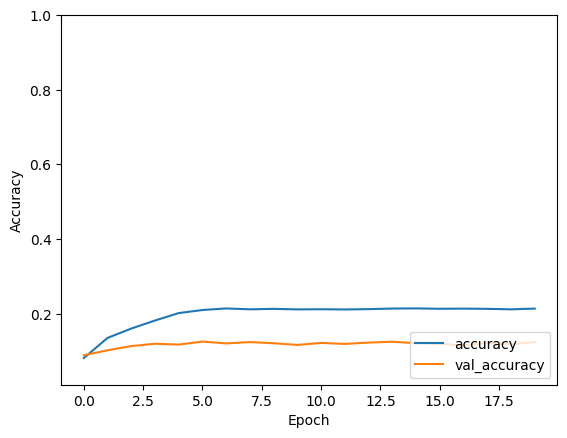

In [36]:
# plotting the accuracy with sequence of epoch


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.01, 1])
plt.legend(loc='lower right')

In [37]:
# creating a function that generate words using the model, word, number of prediction, list of words

def generate(model,word, N, a):
  finalWord = word
  word = (word.split())[-1]
  for r in range(N):
    token = tokenizer.texts_to_sequences([word])[0]
    token = np.array(token)
    if len(token) == 0:
      return "word cannot be predicted"
    prediction = model.predict(token)
    prediction = np.argmax(prediction)
    prediction = a[prediction-1]
    finalWord = finalWord + ' ' + prediction
    word = prediction

  return finalWord


In [38]:
# af = "hello world"
# af = af.split()[-1]
# print(af)

In [39]:
# checking with some word in prediction
# tokenize the input and convert to numpy

token = tokenizer.texts_to_sequences(["dream"])[0]
token = np.array(token)

In [40]:
print(token)

[925]


In [41]:

# get the prediction
predicted_class = model.predict(token)

1/1 [==============================] - 1s 851ms/step


In [42]:
predicted_class

array([[1.31840953e-11, 2.00128891e-02, 6.48236182e-03, ...,
        1.41558865e-11, 1.39538138e-11, 1.50169287e-11]], dtype=float32)

In [43]:
predicted_word_index = np.argmax(predicted_class)

In [44]:
predicted_word_index

5

In [45]:
# check the probability

predicted_class[:,predicted_word_index][0]

0.45551363

In [46]:
print(tokenizer.word_index)

{'the': 1, 'to': 2, 'and': 3, 'he': 4, 'his': 5, 'of': 6, 'was': 7, 'it': 8, 'had': 9, 'in': 10, 'that': 11, 'gregor': 12, 'a': 13, 'as': 14, 'she': 15, 'with': 16, 's': 17, 'him': 18, 'her': 19, 'would': 20, 'not': 21, 'but': 22, 'at': 23, 'for': 24, 'they': 25, 'on': 26, 'all': 27, 'room': 28, 'from': 29, 'could': 30, 'be': 31, 'out': 32, 'have': 33, 'there': 34, 'if': 35, 'father': 36, 'been': 37, 'sister': 38, 'so': 39, 'this': 40, 'i': 41, 'now': 42, 'mother': 43, 'himself': 44, 'door': 45, 'then': 46, 'back': 47, 'up': 48, 'even': 49, 'into': 50, 'what': 51, 'no': 52, 'did': 53, 'one': 54, 'more': 55, 'their': 56, 'when': 57, 'were': 58, 'about': 59, 'them': 60, 't': 61, 'you': 62, 'way': 63, 'only': 64, 'time': 65, 'by': 66, 'than': 67, 'just': 68, 'said': 69, 'little': 70, 'any': 71, 'other': 72, 'do': 73, 'get': 74, 'still': 75, 'first': 76, 'or': 77, 'made': 78, 'go': 79, 'some': 80, 'while': 81, 'see': 82, 'again': 83, 'without': 84, 'like': 85, 'head': 86, 'before': 87, 'mu

In [47]:
# h = tokenizer.word_index

In [48]:
# ?h

In [49]:


# D = [key for key in h]
D = [key for key,val in tokenizer.word_index.items() ]


In [50]:
# -1 because tokenizer indexing from prediction class list index start from 0

D[predicted_word_index-1]

'his'

In [51]:
print(generate(model,"it was simple",2, D))

1/1 [==============================] - 0s 33ms/step
it was simple matter with


In [52]:
print(generate(model,"I",2, D))

1/1 [==============================] - 0s 38ms/step
I m sure


In [53]:
print(generate(model,"we play",2, D))

1/1 [==============================] - 0s 27ms/step
we play with his


In [54]:
print(generate(model,"my",3, D))

1/1 [==============================] - 0s 32ms/step
my parents and he
